## Preprocessing

In [22]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from google.colab import files
import matplotlib.pyplot as plt

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(['EIN', 'NAME'], axis=1)

In [3]:
# Determine the number of unique values in each column.
unique_values = application_df.nunique()
unique_values

,0
APPLICATION_TYPE,17
AFFILIATION,6
CLASSIFICATION,71
USE_CASE,5
ORGANIZATION,4
STATUS,2
INCOME_AMT,9
SPECIAL_CONSIDERATIONS,2
ASK_AMT,8747
IS_SUCCESSFUL,2


In [4]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
application_type_counts = application_df.groupby(["APPLICATION_TYPE"]).size().sort_values(ascending=False)
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = application_type_counts[application_type_counts < 500].index

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
application_df['APPLICATION_TYPE'].value_counts()

,count
APPLICATION_TYPE,
T3,27037
T4,1542
T6,1216
T5,1173
T19,1065
T8,737
T7,725
T10,528
Other,276


In [5]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
classification_counts = application_df.groupby(["CLASSIFICATION"]).size().sort_values(ascending=False)

# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = classification_counts[classification_counts < 1000].index

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
application_df['CLASSIFICATION'].value_counts()

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
Other,2261
C3000,1918
C2100,1883


In [6]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
classification_counts = application_df.groupby(["CLASSIFICATION"]).size().sort_values(ascending=False)

# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = classification_counts[classification_counts < 1000].index

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
application_df['CLASSIFICATION'].value_counts()

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
Other,2261
C3000,1918
C2100,1883


In [7]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df_encoded = pd.get_dummies(application_df)

In [8]:
# Split our preprocessed data into our features and target arrays
X = application_df_encoded.drop(columns=['IS_SUCCESSFUL'])
y = application_df_encoded['IS_SUCCESSFUL']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [9]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [10]:
# Build the model with additional hidden layers
nn_1 = tf.keras.models.Sequential()

# First hidden layer
nn_1.add(tf.keras.layers.Dense(units=100, activation='relu', input_dim=X_train_scaled.shape[1]))

# Second hidden layer
nn_1.add(tf.keras.layers.Dense(units=80, activation='relu'))

# Third hidden layer
nn_1.add(tf.keras.layers.Dense(units=50, activation='relu'))

# Output layer
nn_1.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Compile the model
nn_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
# Train the model
history_1 = nn_1.fit(X_train_scaled, y_train, epochs=200, batch_size=54, validation_data=(X_test_scaled, y_test))

Epoch 1/200
477/477 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.7053 - loss: 0.5918 - val_accuracy: 0.7220 - val_loss: 0.5618
Epoch 2/200
477/477 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7264 - loss: 0.5567 - val_accuracy: 0.7261 - val_loss: 0.5576
Epoch 3/200
477/477 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7340 - loss: 0.5465 - val_accuracy: 0.7276 - val_loss: 0.5575
Epoch 4/200
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7284 - loss: 0.5503 - val_accuracy: 0.7290 - val_loss: 0.5553
Epoch 5/200
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7336 - loss: 0.5455 - val_accuracy: 0.7301 - val_loss: 0.5544
Epoch 6/200
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7282 - loss: 0.5521 - val_accuracy: 0.7294 - val_loss: 0.5555
Epoch 7/200
477/477 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7358 - loss: 0.5440 - val_accuracy: 0.7300 - val_loss: 0.5557
Epoch 8/200
477/477 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7314 - loss: 0.5476 - val_ac

In [13]:
# Export our model to HDF5 file
nn_1.save("AlphabetSoupCharityOptimization_nn1.h5")
# Download h5 file
files.download("AlphabetSoupCharityOptimization_nn1.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
# Define the model with Dropout layers
nn_dropout = tf.keras.models.Sequential()

# First hidden layer with 100 neurons and dropout
nn_dropout.add(tf.keras.layers.Dense(units=100, activation='relu', input_dim=X_train_scaled.shape[1]))
nn_dropout.add(tf.keras.layers.Dropout(0.2))  # Dropout layer with 20% dropout

# Second hidden layer with 50 neurons and dropout
nn_dropout.add(tf.keras.layers.Dense(units=50, activation='relu'))
nn_dropout.add(tf.keras.layers.Dropout(0.2))  # Dropout layer with 20% dropout

# Output layer
nn_dropout.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


# Compile the model
nn_dropout.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
# Train the model
history_dropout = nn_dropout.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test))

Epoch 1/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6857 - loss: 0.6102 - val_accuracy: 0.7282 - val_loss: 0.5585
Epoch 2/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7249 - loss: 0.5659 - val_accuracy: 0.7304 - val_loss: 0.5566
Epoch 3/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7249 - loss: 0.5635 - val_accuracy: 0.7266 - val_loss: 0.5553
Epoch 4/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7278 - loss: 0.5585 - val_accuracy: 0.7307 - val_loss: 0.5575
Epoch 5/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7317 - loss: 0.5531 - val_accuracy: 0.7315 - val_loss: 0.5533
Epoch 6/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7291 - loss: 0.5581 - val_accuracy: 0.7333 - val_loss: 0.5539
Epoch 7/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7316 - loss: 0.5540 - val_accuracy: 0.7308 - val_loss: 0.5565
Epoch 8/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7339 - loss: 0.5505 - val_accu

In [16]:
# Export our model to HDF5 file
nn_dropout.save("AlphabetSoupCharityOptimization_nn2.h5")
# Download h5 file
files.download("AlphabetSoupCharityOptimization_nn2.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
# Define the model with Leaky ReLU activation
nn_leaky_relu = tf.keras.models.Sequential()

# First hidden layer with Leaky ReLU activation
nn_leaky_relu.add(tf.keras.layers.InputLayer(input_shape=(X_train_scaled.shape[1],)))
nn_leaky_relu.add(tf.keras.layers.Dense(units=100))
nn_leaky_relu.add(tf.keras.layers.LeakyReLU(negative_slope=0.1))  # Use negative_slope instead of alpha

# Second hidden layer with Leaky ReLU activation
nn_leaky_relu.add(tf.keras.layers.Dense(units=50))
nn_leaky_relu.add(tf.keras.layers.LeakyReLU(negative_slope=0.1))  # Use negative_slope

# Output layer
nn_leaky_relu.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [18]:
# Compile the model
nn_leaky_relu.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Train the model
history_leaky_relu = nn_leaky_relu.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test))


Epoch 1/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7094 - loss: 0.5796 - val_accuracy: 0.7289 - val_loss: 0.5618
Epoch 2/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7298 - loss: 0.5547 - val_accuracy: 0.7256 - val_loss: 0.5578
Epoch 3/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7237 - loss: 0.5547 - val_accuracy: 0.7269 - val_loss: 0.5609
Epoch 4/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7300 - loss: 0.5511 - val_accuracy: 0.7264 - val_loss: 0.5589
Epoch 5/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7346 - loss: 0.5476 - val_accuracy: 0.7283 - val_loss: 0.5566
Epoch 6/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7315 - loss: 0.5458 - val_accuracy: 0.7265 - val_loss: 0.5543
Epoch 7/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7296 - loss: 0.5504 - val_accuracy: 0.7276 - val_loss: 0.5563
Epoch 8/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7318 - loss: 0.5517 - val_accu

In [19]:
# Export our model to HDF5 file
nn_leaky_relu.save("AlphabetSoupCharityOptimization_nn3.h5")
# Download h5 file
files.download("AlphabetSoupCharityOptimization_nn3.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
# Helper function to plot accuracy and loss and save the images
def plot_history_and_save(history, model_name, file_name):

    # Plot accuracy
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Save the plot as an image file
    plt.tight_layout()
    plt.savefig(file_name)

    # If in Google Colab, download the image
    files.download(file_name)
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

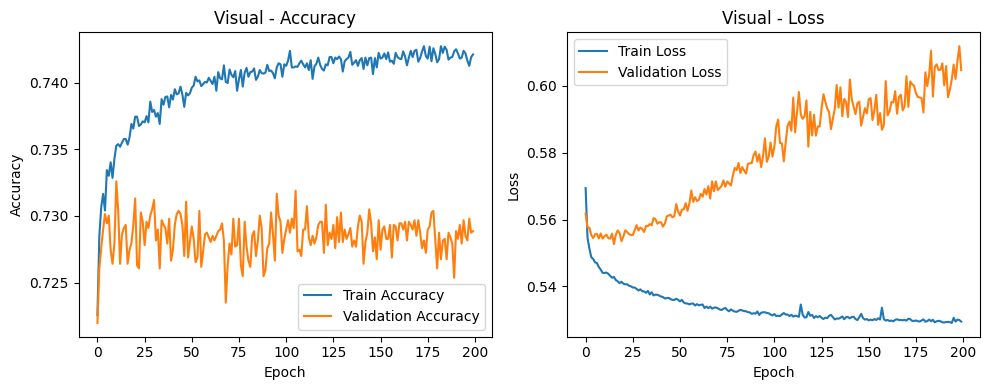

In [29]:
# Generate plot for model 2 optimization and save
plot_history_and_save(history_1, "Visual", "visuals.png")